In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

Este projeto visa prever características importantes do café, como qualidade e rendimento, a partir de dados ambientais como temperatura e umidade.

 O processo segue as etapas do CRISP-DM, que é um modelo que descreve abordagens comuns para resolver problemas de mineração de dados. Ele é dividido em seis fases principais, que incluem: Entendimento do negócio, Preparação de dados, Modelagem, Avaliação, Implementaçã

* Compreensão do Negócio: Definição dos objetivos do projeto para prever dados relevantes sobre o café.
* Análise Exploratória de Dados (EDA): Exploração dos dados para identificar padrões e tratar inconsistências.
* Preparação dos Dados: Limpeza, transformação e criação de novas features para otimizar o modelo.
* Modelagem: Aplicação de modelos como XGBRegressor, SVR e KNN, com otimização de hiperparâmetros.
* Avaliação: Avaliação da performance dos modelos com métricas como RMSE e MAE.
* Implantação: Seleção do XGBRegressor para implementação em produção, devido ao seu desempenho superior.


### Este dataset contém informações sobre diferentes cafés e suas avaliações. A seguir, apresentamos a descrição das colunas e algumas hipóteses que podem ser levantadas para análise.

 Descrição das Colunas

1. **Name**: Nome do café.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: O nome do café, que pode ser uma marca ou uma descrição do tipo de 
     produto.

2. **Roaster**: Nome do torrefador.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Refere-se à empresa ou marca responsável pela torrefa
     ção do café.

3. **Roast**: Tipo de torra do café (Exemplo: Light, Medium, Dark).
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Indica o grau de torra do café. Pode influenciar o sabor e a inte
     nsidade do café.

4. **Loc_Country**: País de localização do torrefador ou da empresa.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: País onde
      o café foi torrado.

5. **Origin**: País ou região de origem dos grãos de café.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Indica o local de cultivo dos grãos de café, como Brasil,
      Colômbia, Etiópia, etc.

6. **100g_USD**: Preço do café por 100g em dólares americanos.
   - Tipo de dado: Numérico (Contínuo)
   - Descrição: O preço do café
      por 100 gramas, em dólares.

7. **Rating**: Classificação do café
   - Tipo de dado: Numérico (Contínuo)
   - Descrição: A nota média dada pelos consumidores ao café, ref
     letindo sua qualidade percebida.

8. **Review_Date**: Data da avaliação.
   - Tipo de dado: Temporal (Data)
   - Descrição: A data em que a avaliação foi feita.

9. **Review**: Texto da avaliação.
   - Tipo de dado: Texto (String)
   - Descrição: Comentários
     offe` e sugerir abordagens para exploração e validação das hipóteses.


In [4]:
# importando os dados
data = pd.read_csv('../data/raw/simplified_coffee.csv')
data.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,mes,ano,preco_qualidade,idade_cafe,avaliacao_rating,classificacao_preco
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November,2017,0.051087,7,High,barato
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November,2017,0.045543,7,High,barato
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November,2017,0.051596,7,High,barato
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November,2017,0.055269,7,High,barato
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November,2017,0.042688,7,High,barato


In [5]:
data['100g_USD'].max()

11.02

In [6]:
data[data['100g_USD'] == 132.28]

,name,roaster,roast,loc_country,origin,100g_USD,rating,mes,ano,preco_qualidade,idade_cafe,avaliacao_rating,classificacao_preco


### Descrição dos dados

In [7]:
data.describe()

,100g_USD,rating,ano,preco_qualidade,idade_cafe
count,953.000000,953.000000,953.000000,953.000000,953.000000
mean,5.984669,93.179433,2020.158447,0.064199,3.841553
std,1.646656,1.310236,1.469249,0.017552,1.469249
min,1.470000,89.000000,2017.000000,0.016517,2.000000
25%,4.970000,92.000000,2019.000000,0.053011,3.000000
50%,5.640000,93.000000,2020.000000,0.060645,4.000000
75%,6.760000,94.000000,2021.000000,0.073118,5.000000
max,11.020000,97.000000,2022.000000,0.116264,7.000000


In [8]:
data.shape

(953, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 953 non-null    object 
 1   roaster              953 non-null    object 
 2   roast                949 non-null    object 
 3   loc_country          953 non-null    object 
 4   origin               953 non-null    object 
 5   100g_USD             953 non-null    float64
 6   rating               953 non-null    int64  
 7   mes                  953 non-null    object 
 8   ano                  953 non-null    int64  
 9   preco_qualidade      953 non-null    float64
 10  idade_cafe           953 non-null    int64  
 11  avaliacao_rating     953 non-null    object 
 12  classificacao_preco  953 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 96.9+ KB


### Verificando valores nulos no nosso conjunto de dados

In [10]:
data.isnull().sum()

name                   0
roaster                0
roast                  4
loc_country            0
origin                 0
100g_USD               0
rating                 0
mes                    0
ano                    0
preco_qualidade        0
idade_cafe             0
avaliacao_rating       0
classificacao_preco    0
dtype: int64

In [14]:

preco_medio = data['100g_USD'].mean()

# Calcular os percentis (25%, 50%, 75%)
percentil_25 = data['100g_USD'].quantile(0.25)
percentil_50 = data['100g_USD'].median()
percentil_75 = data['100g_USD'].quantile(0.75)

# Identificar o maior valor de preço
preco_maximo = data['100g_USD'].max()

amplitude_rating = data['rating'].max() - data['rating'].min()
iqr_rating = data['rating'].quantile(0.75) - data['rating'].quantile(0.25)

print(f"Preço médio dos grãos de café: USD {preco_medio:.2f}")
print(f"75% dos cafés têm preço até: USD {percentil_75:.2f}")
print(f"Maior valor de café: USD {preco_maximo:.2f} (possível outlier)")
print(f"Amplitude das notas de avaliação: {amplitude_rating}")
print(f"Distância interquartil (IQR) das notas: {iqr_rating:.2f}")


Preço médio dos grãos de café: USD 5.98
75% dos cafés têm preço até: USD 6.76
Maior valor de café: USD 11.02 (possível outlier)
Amplitude das notas de avaliação: 8
Distância interquartil (IQR) das notas: 2.00


 A função a seguir, localiza e remove os outliers no conjunto de dados utilizando o intervalo interquartil

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detectar e remover outliers em variáveis numéricas
outliers_dict = {}
for col in data.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(data, col)
    if not outliers.empty:
        outliers_dict[col] = len(outliers)
        data = data[~data.index.isin(outliers.index)]

### Features Enginner

O Feature Engineering é o processo de criar novas variáveis a partir das já existentes no conjunto de dados. Isso é feito para fornecer informações mais ricas aos modelos de machine learning, ajudando-os a aprender padrões de forma mais eficiente e a gerar previsões mais precisas.

Essa técnica pode envolver diversas abordagens, como:

* Transformações matemáticas simples: Criar novas variáveis através de operações como soma, subtração, multiplicação ou divisão entre colunas existentes.
* Conversões de tipos de dados: Transformar variáveis categóricas em variáveis numéricas (ou vice-versa), como converter uma data em uma variável que represente a idade.
* Criação de variáveis agregadas: Combinar múltiplas variáveis para representar uma característica mais robusta, como calcular a média, soma ou produto de colunas numéricas.

O impacto do Feature Engineering é significativo, pois ele pode melhorar tanto a análise exploratória dos dados quanto o desempenho dos modelos de machine learning. Ao fornecer informações mais relevantes, essa técnica ajuda os modelos a capturar melhor a complexidade dos dados, resultando em previsões mais acuradas e generalizáveis.

In [15]:
# preço por unidade de qualidade

data['preco_qualidade'] = data['100g_USD']/data['rating']

# idade do café, considerando o ano que estamos

ano = 2024
data['idade_cafe'] = ano - data['ano']

# intervalo de avaliação

bins = [0 , 85, 90, 95, 100]
labels = ['Low', 'Medium', 'High', 'Excellent']
data['avaliacao_rating'] = pd.cut(data['rating'], bins = bins , labels = labels)


#Classificação de preço
data['classificacao_preco'] = pd.qcut(data['100g_USD'], q =3, labels = ['barato', 'intermediario', 'caro'] )

Vizulizando as novas features

In [16]:
data

,name,roaster,roast,loc_country,origin,100g_USD,rating,mes,ano,preco_qualidade,idade_cafe,avaliacao_rating,classificacao_preco
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November,2017,0.051087,7,High,barato
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November,2017,0.045543,7,High,barato
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November,2017,0.051596,7,High,barato
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November,2017,0.055269,7,High,barato
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November,2017,0.042688,7,High,barato
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,92,November,2022,0.051087,2,High,barato
949,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November,2022,0.031613,2,High,barato
950,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November,2022,0.031613,2,High,barato
951,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,93,November,2022,0.050538,2,High,barato


### Hipóteses e Perguntas Levantadas

### Cafés mais Caros podem ser Avaliados de Forma mais Positiva?

Pela análise gráfica, sugere que o preço do café está fortemente ligado à sua qualidade percebida, ou seja, em geral a qualidade do café, medida pela nota, está positivamente relacionada ao seu preço. Consumidores que buscam cafés de alta qualidade estão dispostos a pagar mais por eles.

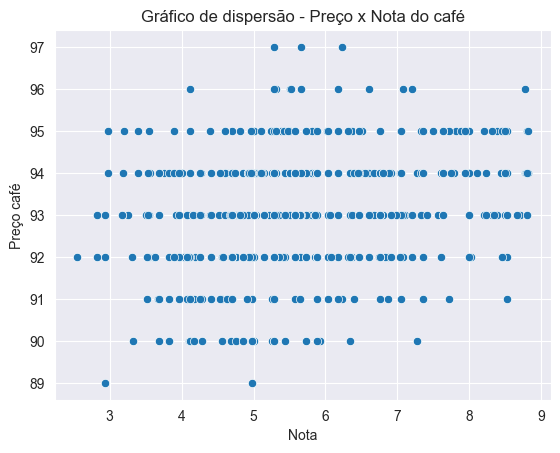

In [20]:
ax = sns.scatterplot(data=data,  x='100g_USD', y='rating',)
plt.title("Gráfico de dispersão - Preço x Nota do café")
ax.set_xlabel('Nota')
ax.set_ylabel('Preço café')
plt.savefig("Cafés_caros_avaliados.png")
plt.show()

### Influência do Local de Venda no Preço do Café

Esse gráfico já pode sugerir que o preço pode estar relacionado com o local da venda, uma vez que os grãos mais caros estão em países mais desenvolvidos e não produtores de café (Taiwan, Estados Unidos, Inglaterra)

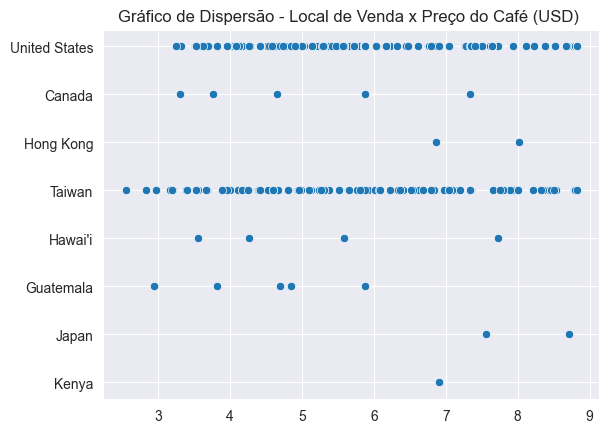

In [21]:
ax = sns.scatterplot(data=data, y='loc_country', x='100g_USD')
plt.title("Gráfico de Dispersão - Local de Venda x Preço do Café (USD) ")
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("Influência_local_venda.png")
plt.show()

### O valor do café apresenta uma tendência de crescimento?

O gráfico apresenta a evolução do valor do café entre 2017 e 2022, destacando um crescimento moderado até 2019, seguido por um aumento acentuado a partir de 2020. Essa tendência pode estar relacionada a fatores como aumento da demanda global, restrições na oferta ou impacto de eventos externos, como crises econômicas ou climáticas, que influenciaram o mercado nesse período.

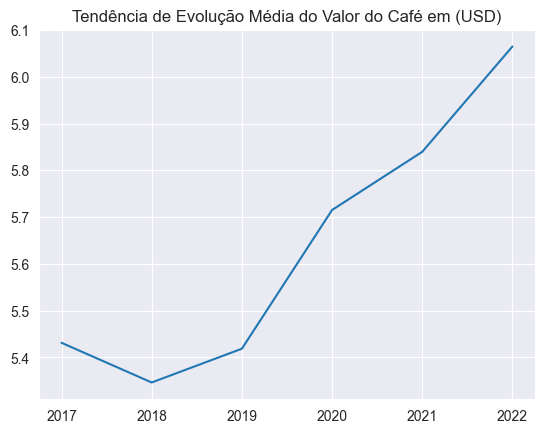

In [38]:
# calcular a média de '100g_USD' por ano
media_por_ano = data.groupby('ano')['100g_USD'].mean()
plt.plot(media_por_ano.index, media_por_ano.values)
plt.title('Tendência de Evolução Média do Valor do Café em (USD)')
plt.savefig("valor_cafe_tendencia_crescimento.png")
plt.show()

### A média das notas apresenta um crescimento consistente ao passar do tempo?

O gráfico apresenta a média de mudança na nota ao longo do tempo, mostrando uma leve estabilidade entre 2017 e 2018, seguida por um aumento significativo a partir de 2019, que continua até 2022. Isso indica uma melhoria consistente na média das notas ao longo dos anos, possivelmente relacionada a mudanças nos critérios de avaliação, melhorias nos processos ou aumento de desempenho geral.

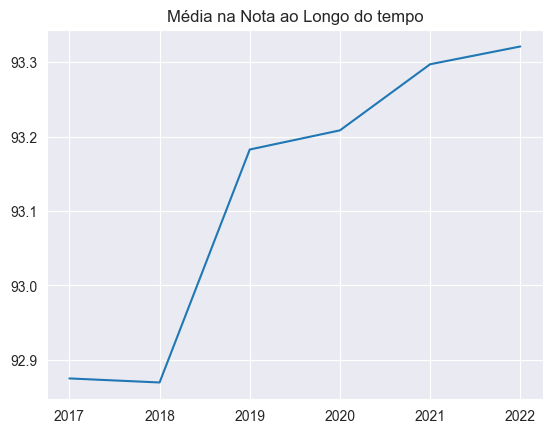

In [60]:
media_por_ano = data.groupby('ano')['rating'].mean()
plt.plot(media_por_ano.index, media_por_ano.values)
plt.title('Média na Nota ao Longo do tempo')
plt.savefig("media_notas_crescimento_consistente.png")
plt.show()

 Agora, vamos ver quantos países produtores distintos a base possui e em quantos países esses vendedores estão localizados. Depois vamos repetir as análises para os cafés mais caros.

In [22]:
paises_produtores = data['origin'].nunique()
paises_vendedores = data['loc_country'].nunique()

print(f"Existem {paises_produtores} países produtores")
print(f"Existem {paises_vendedores} países que vendem esses cafés")

# Listar os países produtores e vendedores de café
print("\nPaíses produtores:", data['origin'].unique())
print("\nPaíses vendedores:", data['loc_country'].unique())

Existem 24 países produtores
Existem 8 países que vendem esses cafés

Países produtores: ['Ethiopia' 'Kenya' 'Guatemala' 'Colombia' 'Nicaragua' 'Indonesia' 'Peru'
 'Rwanda' 'Costa Rica' 'Ecuador' 'Brazil'
 'Democratic Republic Of The Congo' 'Burundi' 'El Salvador' 'Panama'
 "Hawai'I" 'Nepal' 'Bolivia' 'Mexico' 'Dominican Republic' 'Honduras'
 'Thailand' 'Uganda' 'Yemen']

Países vendedores: ['United States' 'Canada' 'Hong Kong' 'Taiwan' "Hawai'i" 'Guatemala'
 'Japan' 'Kenya']


O gráfico apresenta os 10 principais países produtores de café, classificados pela nota média de seus grãos. A Tanzânia lidera o ranking, seguida de perto pelo Panamá e Equador. Quênia e Iêmen completam a lista dos cinco primeiros. A alta classificação desses países indica uma qualidade excepcional em seus cafés, resultado de fatores como clima, variedade de grãos e processos de produção

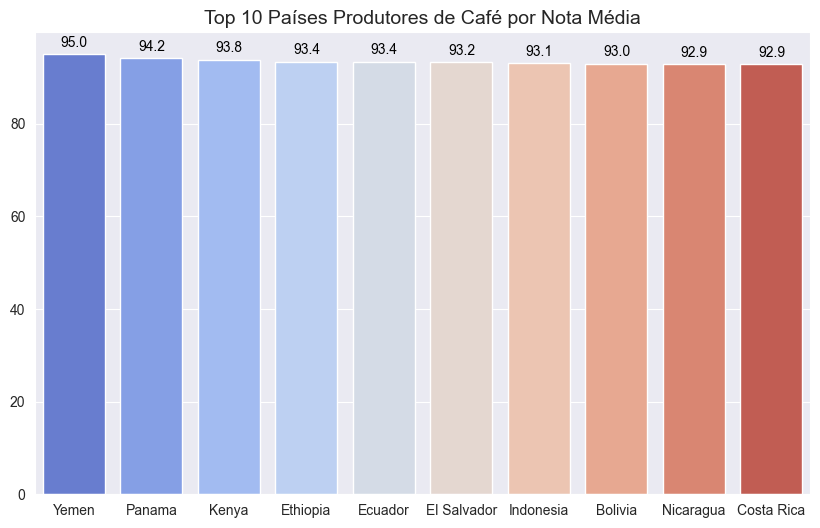

In [23]:
media_notas = data.groupby('origin')['rating'].mean()
top_10_paises = media_notas.nlargest(10)

plt.figure(figsize = (10, 6))

ax = sns.barplot(x = top_10_paises.index, y = top_10_paises.values, palette = "coolwarm")

# Adicionando os valores das médias nas barras
for i, valor in enumerate(top_10_paises.values):
    ax.text(i, valor + 1, f"{valor:.1f}", ha = "center", va= "bottom", fontsize = 10, color = "black")

plt.title("Top 10 Países Produtores de Café por Nota Média", fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation = 360)
plt.show()

In [ ]:
# Salvando o dataset, sem os outliers e com as novas features criadas

#data.to_csv("../data/raw/simplified_coffee.csv", index=False)

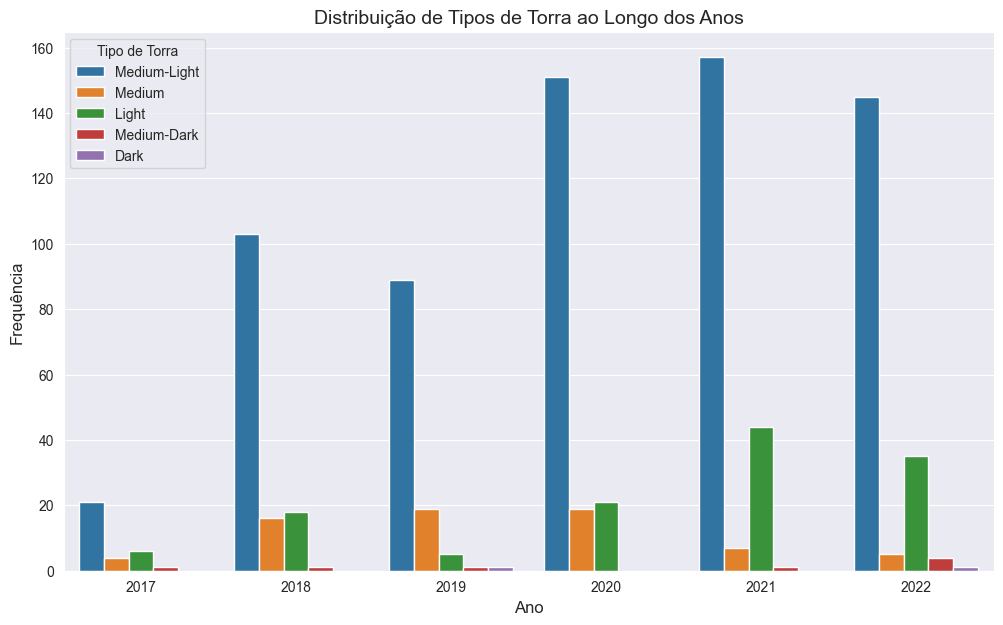

In [56]:
plt.figure(figsize=(12, 7))
sns.countplot(x="ano", hue="roast", data=data, palette="tab10")

# Configurações do gráfico
plt.title("Distribuição de Tipos de Torra ao Longo dos Anos", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.legend(title="Tipo de Torra")
plt.savefig("tipo_torre_longo_tempo.png")
plt.show()

### Insights

### 1. Associação entre Preços Mais Altos e Avaliações Mais Positivas

Existe uma possibilidade de que cafés com preços mais elevados recebam avaliações mais positivas. Isso pode indicar que consumidores associam preços mais altos à maior qualidade do produto. Essa percepção pode ser influenciada por fatores como:

Qualidade dos Grãos: Cafés mais caros frequentemente utilizam grãos de origem única ou de cultivos sustentáveis, que tendem a oferecer sabores mais complexos e aromáticos.

Processo de Torrefação: Métodos de torrefação mais artesanais e cuidadosos podem resultar em um produto final superior, justificando preços mais elevados.

Experiência do Consumidor: Consumidores dispostos a pagar mais podem esperar uma experiência de consumo diferenciada, influenciando suas avaliações positivas.


### 2. Impacto do Local de Venda ou Torrefação no Preço

O local onde o café é vendido ou torrado pode ter um impacto significativo no preço final do produto. Isso reflete:

Custos Operacionais: Regiões diferentes possuem custos variáveis de operação, como aluguel, mão de obra e transporte, que podem influenciar o preço do café.

Preferências Regionais: As preferências de sabor e qualidade podem variar de uma região para outra, afetando a demanda e, consequentemente, os preços.

Logística e Distribuição: A proximidade com centros de produção ou consumo pode reduzir custos de logística, permitindo preços mais competitivos.


### 3. Melhoria da Qualidade dos Cafés ao Longo dos Anos

A análise sugere que a qualidade dos cafés tem melhorado ao longo do tempo, possivelmente devido a:

Aprimoramento das Práticas de Cultivo: Técnicas agrícolas mais avançadas e sustentáveis contribuem para a produção de grãos de melhor qualidade.

Inovação na Torrefação: Investimentos em tecnologia e processos de torrefação mais precisos resultam em perfis de sabor mais refinados.

Educação e Treinamento: Aumento do conhecimento dos produtores e torrefadores sobre as melhores práticas, promovendo uma maior consistência e excelência no produto final.

### 4. Distribuição de Tipos de Torras de Café ao Longo do tempo

Predominância do tipo "Medium-Light": O tipo de torra "Medium-Light" apresenta consistentemente a maior frequência em todos os anos analisados, indicando uma preferência significativa por este tipo de torra ao longo do tempo.

Crescimento da popularidade de "Light" e estabilidade de "Medium":

O tipo "Light" apresenta um aumento de frequência nos últimos anos, principalmente a partir de 2020, sugerindo um interesse crescente por torras mais claras.
O tipo "Medium" tem uma distribuição menos significativa, mas constante, ao longo do período.
Baixa popularidade de "Dark" e "Medium-Dark": Ambos os tipos de torra mais escuras (Dark e Medium-Dark) possuem frequências muito baixas em todos os anos, indicando uma baixa preferência por esses tipos de café.

Padrões de estabilidade geral: A distribuição dos tipos de torra se mantém relativamente estável ao longo dos anos, com pequenas variações em alguns tipos específicos, como o aumento no consumo de torras mais claras.

Ano de maior destaque para "Medium-Light": O ano com maior frequência para "Medium-Light" foi 2020, o que pode indicar um pico de popularidade ou aumento na produção desse tipo de torra nesse ano.

